在上一篇《Python之区块链入门》中讲述了区块链的基础知识，并用Python实现了区块和区块链的结构。在本篇中，将基于上面的内容实现一个简单的记账本功能。

记账本的功能如下：

1. 实现基本的收支记录；
2. 计算当前余额；
3. 对收支情况做简单统计分析。

账单记录的格式如下：

    日期|描述|金额

下面开始一步步实现上述功能。


### 一、定义收支记录

在上一篇中区块的内容是简单的文本，这里实现将基于Block实现一个支持收支记录格式的类，代码如下：

In [36]:
from datetime import datetime

class AccountBill(Block):
    
    def __init__(self, content, amount):
        t = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        data = "{}|{}|{}".format(t, content, amount)
        return super(AccountBill, self).__init__(data)
    
    '''
        获取金额数量
    '''
    def get_amount(self):
        amount = 0
        if self.data:
            amount = int(self.data.split('|')[2])
        return amount
    
    def get_content(self):
        content = ''
        if self.data:
            content = self.data.split('|')[1]
        return content

    def __repr__(self):
        return 'Bill: {}>'.format(
            self.data
        )

In [37]:
# 创建记录

AccountBill('测试', 100)

Bill: 2017-07-30 10:46:23|测试|100>

### 二、计算当前余额

上面已经定义了收支记录，接下来在BlockChain基础上定义一个方法用来计算当前余额。代码如下：

In [91]:
from collections import OrderedDict

class AccountBook(BlockChain):
    
    def __init__(self):
        self.head = None   # 指向最新的一个区块
        self.blocks = OrderedDict()   # 包含所有区块的一个字典

    '''
        添加记录
    '''
    def add_block(self, new_bill):
        new_bill.mine()
        super(AccountBook, self).add_block(new_bill)
        
    '''
        计算当前余额
    '''
    def balance(self):
        balance = 0
        if self.blocks:
            for k, v in self.blocks.items():
                balance += v['block'].get_amount()
        return balance

    
    def __repr__(self):
        num_existing_blocks = len(self.blocks)
        return 'AccountBook<{} Bills, Head: {}>'.format(
            num_existing_blocks,
            self.head.identifier if self.head else None
        )

In [92]:
# 创建几笔记录

book = AccountBook()

b1 = AccountBill('工资', 10000)
book.add_block(b1)

b2 = AccountBill('房租', -2500)
book.add_block(b2)

b3 = AccountBill('衣服', -1500)
book.add_block(b3)

b4 = AccountBill('吃饭', -1000)
book.add_block(b4)

b5 = AccountBill('股票收入', 200)
book.add_block(b5)

b6 = AccountBill('看电影', -200)
book.add_block(b6)

b7 = AccountBill('购物', -1000)
book.add_block(b7)

b8 = AccountBill('水电费等', -100)
book.add_block(b8)

In [93]:
# 计算当前余额

book.balance()

3900

### 三、简单分析收支记录

In [76]:
# 打印收支记录

for k,v in book.blocks.items():
    print(v['block'].data)

2017-07-30 19:57:57|工资|10000
2017-07-30 19:57:57|房租|-2500
2017-07-30 19:57:57|衣服|-1500
2017-07-30 19:57:58|吃饭|-1000
2017-07-30 19:57:58|股票收入|200
2017-07-30 19:57:58|看电影|-200
2017-07-30 19:57:59|购物|-1000
2017-07-30 19:57:59|水电费等|-100


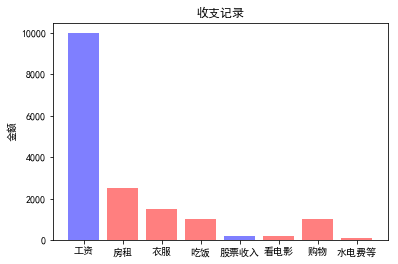

In [50]:
# 使用柱状图展示收支记录

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签


# 初始化数据
x_data = []  # 金额
y_data = []  # 描述
colors = []  # 颜色

for k,v in book.blocks.items():
    bill = v['block']
    y_data.append(bill.get_content())
    amount = bill.get_amount()
    if amount > 0:
        x_data.append(amount)
        colors.append('blue')
    else:
        x_data.append(-amount)
        colors.append('red')

        
y_pos = np.arange(len(y_data))
 
plt.bar(y_pos, x_data, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, y_data)
plt.ylabel('金额')
plt.title('收支记录')
 
plt.show()

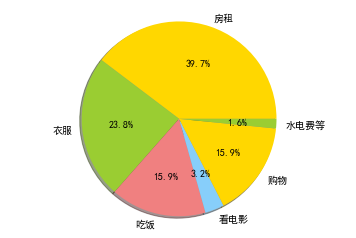

In [55]:
# 简单分析支出组成

labels = []
amounts = []
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'] # 用不同颜色显示
 
for k,v in book.blocks.items():
    bill = v['block']  
    amount = bill.get_amount()
    
    # 只展示支出
    if amount < 0:
        labels.append(bill.get_content())
        amounts.append(-amount)
        

plt.pie(amounts, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()